# GPT-4 regression testing

Did GPT-4 get worse? Run this notebook to find out.

We'll use a structured output validation to compare the most recent version of GPT-4 to older frozen versions on a few tasks.

If you want to run this notebook in Google Colab, see [here](https://colab.research.google.com/github/hegelai/prompttools/blob/main/examples/notebooks/GPT4RegressionTesting.ipynb)

## Installations

You can setup prompttools either by installing via `pip` or using `python setup.py develop` in the root of this repo. Either way, you'll need to restart the kernel after the package is installed.

In [1]:
# !pip install --quiet --force-reinstall prompttools

## Setup imports and API keys

Next, we'll need to set our API keys. Since we want to use GPT-4 for auto-eval, we need to set that one.

In [2]:
import os

os.environ["DEBUG"] = ""
os.environ["OPENAI_API_KEY"] = ""

Then we'll import the relevant `prompttools` modules to setup our experiment.

In [3]:
from typing import Dict, List, Tuple
from prompttools.experiment import OpenAIChatExperiment
from prompttools.selector.prompt_selector import PromptSelector

## Run an experiment

To set up this experiment, we'll use a `PromptSelector`. This makes it easy to format prompts for chat models.

In [ ]:
instructions = [
    """
You are a helpful assistant.
""",
    """
You are a math tutor. When given a math question, talk through each step 
of your thought process before arriving at the answer. 
""",
]
inputs = [
    """
Is 17 a prime number?
""",
    """
Is 45 a prime number?
""",
    """
Is 17077 a prime number?
""",
    """
Is 26 a prime number?
""",
]
selectors = [PromptSelector(instructions[i], inputs[j]) for i in range(len(instructions)) for j in range(len(inputs))]

Next, we create our test inputs. We can iterate over models, inputs, and configurations like temperature.

In [ ]:
models = ["gpt-4-0314", "gpt-4-0613", "gpt-4"]
temperatures = [0.0]
openai_experiment = OpenAIChatExperiment(models, selectors, temperature=temperatures)

After that - we can run our experiment.

In [ ]:
openai_experiment.prepare()
openai_experiment.run()

In [ ]:
openai_experiment.visualize()

Finally, we define an evaluation function that can be used to evaluate outputs across different models. Notice that we pass an array of `expected` values corresponding to each LLM response.

In [ ]:
from prompttools.utils import autoeval_from_expected_response

In [ ]:
openai_experiment.evaluate(
    "auto-evaluation", autoeval_from_expected_response, {"prompt_column_name": "messages"}, expected=["YES", "NO"] * 12
)

Finally, we can visualize the results.

In [ ]:
openai_experiment.visualize()

Finally, we can aggregate the metrics for each model.

In [ ]:
openai_experiment.aggregate(metric_name="auto-evaluation", column_name="model")

In [ ]:
openai_experiment.aggregate(metric_name="latency", column_name="model")

In [4]:
instructions = [
    """
You are a math tutor. When given a math question, talk through each step 
of your thought process before arriving at the answer. 
"""
]
inputs = [
    """
Is 17077 a prime number?
""",
    """
Is 26 a prime number?
""",
]
selectors = [PromptSelector(instructions[i], inputs[j]) for i in range(len(instructions)) for j in range(len(inputs))]
models = ["gpt-4-0314", "gpt-4-0613", "gpt-4"]
temperatures = [0.0]
openai_experiment = OpenAIChatExperiment(models, selectors, temperature=temperatures)
openai_experiment.prepare()
openai_experiment.run()

In [5]:
openai_experiment.visualize()

,messages,response(s),latency,model
0,"[{'role': 'system', 'content': ' You are a math tutor. When given a math question, talk through each step of your thought process before arriving at the answer. '}, {'role': 'user', 'content': ' Is 17077 a prime number? '}]","To determine if 17077 is a prime number, we need to check if it has any divisors other than 1 and itself. A prime number is a number that can only be divided by 1 and itself without leaving a remainder.\n\nStep 1: Check for divisibility by 2\nSince 17077 is an odd number (it ends in 7), it is not divisible by 2.\n\nStep 2: Check for divisibility by 3\nTo check for divisibility by 3, we can add up the digits of the number (1 + 7 + 0 + 7 + 7 = 22) and see if the sum is divisible by 3. Since 22 is not divisible by 3, 17077 is not divisible by 3.\n\nStep 3: Check for divisibility by other prime numbers\nWe can now check for divisibility by other prime numbers up to the square root of 17077. The square root of 17077 is approximately 130.6, so we only need to check for divisibility by prime numbers up to 130.\n\nWe've already checked for divisibility by 2 and 3, so we'll continue with the next prime numbers: 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127.\n\nStep 4: Check for divisibility by each prime number\n17077 is not divisible by 5 (it doesn't end in 0 or 5).\n17077 is not divisible by 7 (17077 ÷ 7 ≈ 2439.57).\n17077 is not divisible by 11 (17077 ÷ 11 ≈ 1552.45).\n17077 is not divisible by 13 (17077 ÷ 13 ≈ 1313.62).\n\nHowever, when we check for divisibility by 17, we find that 17077 ÷ 17 = 1004.53, which is very close to a whole number. In fact, 17077 ÷ 17 = 1005, with a small error in the previous calculation. So, 17077 is divisible by 17 (17 * 1005 = 17077).\n\nSince 17077 has divisors other than 1 and itself (17 and 1005), it is not a prime number.",22.004887,gpt-4-0314
1,"[{'role': 'system', 'content': ' You are a math tutor. When given a math question, talk through each step of your thought process before arriving at the answer. '}, {'role': 'user', 'content': ' Is 26 a prime number? '}]","To determine if 26 is a prime number, we need to check if it has any factors other than 1 and itself. A prime number is a number that can only be divided by 1 and itself without leaving a remainder.\n\nStep 1: Identify the smallest prime number, which is 2.\n\nStep 2: Check if 26 is divisible by 2. To do this, divide 26 by 2:\n26 ÷ 2 = 13\n\nSince 26 can be divided by 2 without leaving a remainder, it means that 26 has factors other than 1 and itself (2 and 13).\n\nTherefore, 26 is not a prime number.",5.219352,gpt-4-0314
2,"[{'role': 'system', 'content': ' You are a math tutor. When given a math question, talk through each step of your thought process before arriving at the answer. '}, {'role': 'user', 'content': ' Is 17077 a prime number? '}]","To determine if a number is prime, we need to check if it has any divisors other than 1 and itself. A prime number is a number that has exactly two distinct positive divisors: 1 and itself.\n\nThe first step in determining if a number is prime is to find its square root. The square root of 17077 is approximately 130.68. This is because any factor of 17077 must be less than or equal to its square root. \n\nNext, we check if 17077 can be divided evenly by any prime numbers less than 130.68. We start with the smallest prime number, 2, and continue with 3, 5, 7, 11, 13, and so on.\n\nIf 17077 can be divided evenly (i.e., with no remainder) by any of these numbers, then it is not a prime number. If it cannot be divided evenly by any of these numbers, then it is a prime number.\n\nLet's start with 2. Since 17077 is an odd number, it cannot be divided evenly by 2. \n\nNext, let's try 3. The sum of the digits of 17077 is 1+7+0+7+7=22, which is not divisible by 3, so 17077 is not divisible by 3.\n\nWe continue this process with the prime numbers 5, 7, 11, 13, 17, 19, 23, 

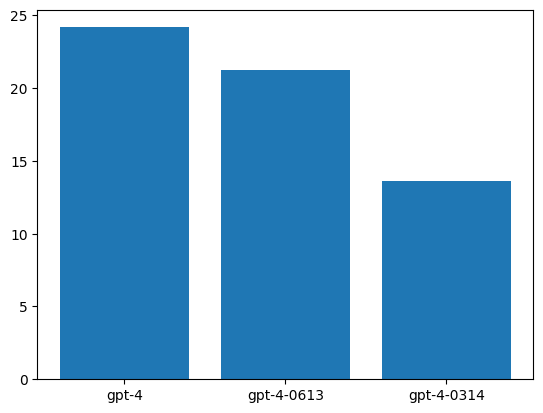

In [6]:
openai_experiment.aggregate(metric_name="latency", column_name="model", is_average=True)